Python executable: C:\Users\miche\Documents\HarborFlow_Fresh\venv\Scripts\python.exe
Pandas version: 3.0.0
Seaborn version: 0.13.2
CSV found at ../data/raw/ais/ais_ports_global_oct2023/Livorno.csv
Dataframe shape: (19700, 45)

Columns and datatypes:
MessageType                          str
AisVersion                       float64
CallSign                           int64
Destination                        int64
DimensionA                       float64
DimensionB                       float64
DimensionC                       float64
DimensionD                       float64
Dte                                 bool
EtaDay                           float64
EtaHour                          float64
EtaMinute                        float64
EtaMonth                         float64
FixType                          float64
ImoNumber                          int64
MaximumStaticDraught             float64
MessageID                          int64
Name                               int64
RepeatIndica

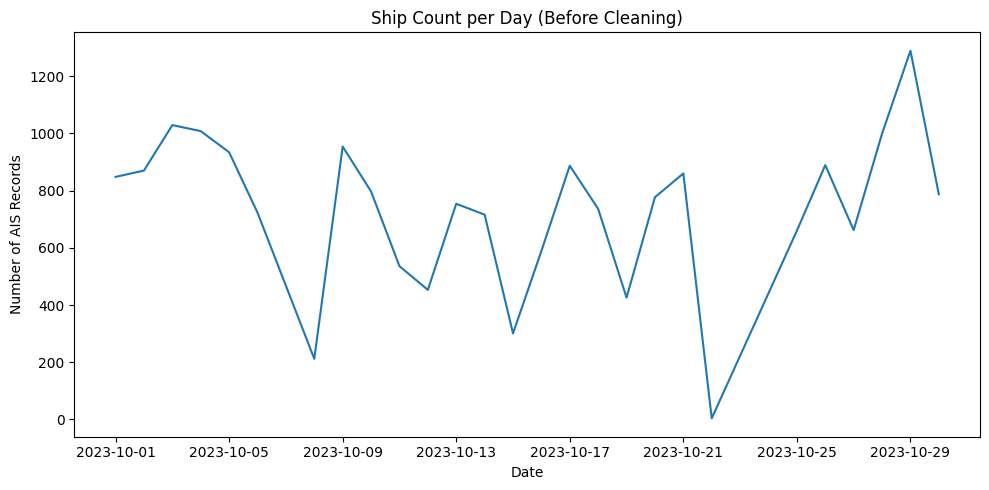

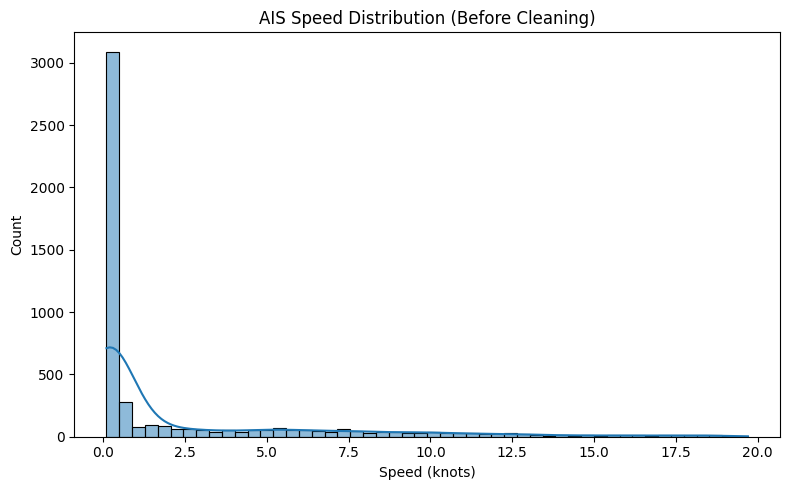

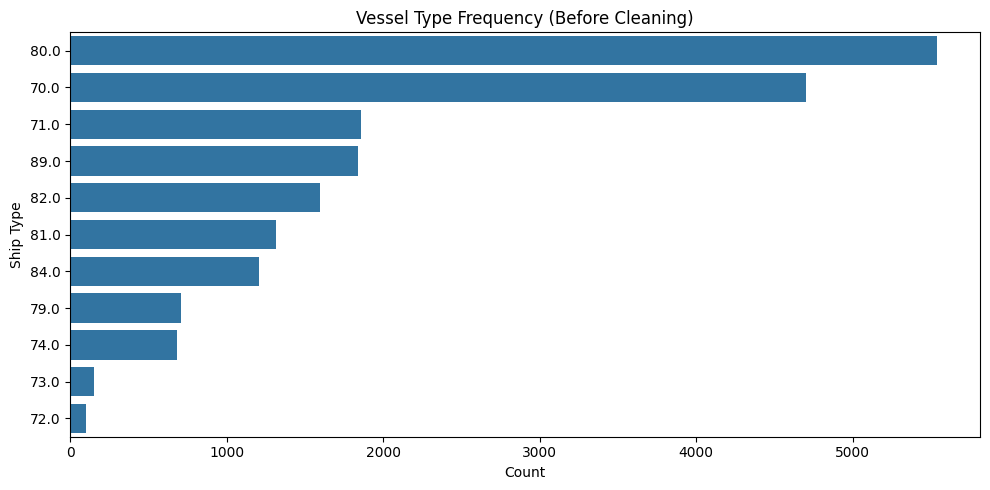

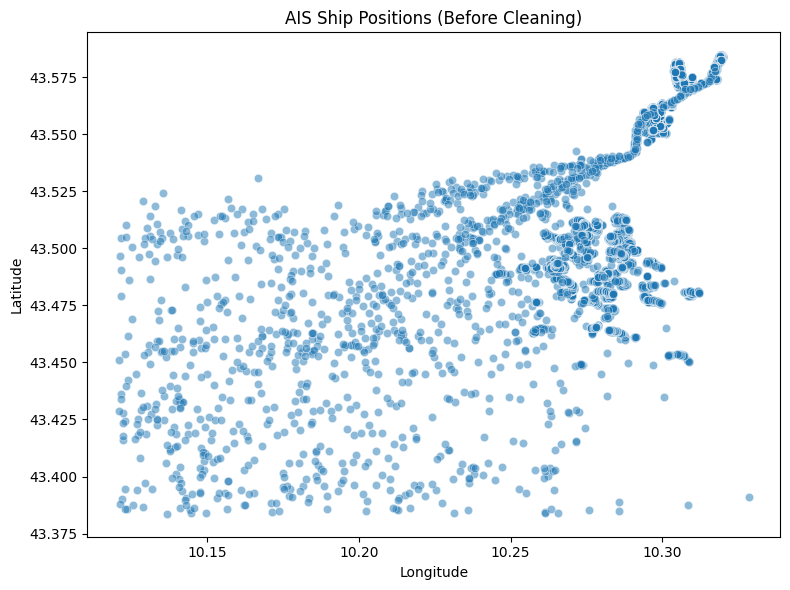

Summary statistics saved to: ../docs/screens/phase1/ais_summary_statistics_before_cleaning.csv


In [3]:
# ===============================
# HarborFlow Phase 1 — AIS EDA
# ===============================

# 1️⃣ Imports
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2️⃣ Ensure plots display in Jupyter
%matplotlib inline

# 3️⃣ Verify Python environment
print("Python executable:", sys.executable)
print("Pandas version:", pd.__version__)
print("Seaborn version:", sns.__version__)

# 4️⃣ File paths (from notebooks folder, go up one level)
ais_csv_path = '../data/raw/ais/ais_ports_global_oct2023/Livorno.csv'
output_dir = '../docs/screens/phase1/'

# Ensure output folder exists
os.makedirs(output_dir, exist_ok=True)

# 5️⃣ Test if CSV exists
if not os.path.exists(ais_csv_path):
    raise FileNotFoundError(f"CSV not found at {ais_csv_path}")
else:
    print(f"CSV found at {ais_csv_path}")

# 6️⃣ Load AIS CSV
df_ais = pd.read_csv(ais_csv_path)

# 7️⃣ Quick data inspection
print("Dataframe shape:", df_ais.shape)
print("\nColumns and datatypes:")
print(df_ais.dtypes)
print("\nFirst 5 rows:")
print(df_ais.head())

# 8️⃣ Check missing values & duplicates
print("\nMissing values per column:")
print(df_ais.isna().sum())
print("\nNumber of duplicate rows:")
print(df_ais.duplicated().sum())

# 9️⃣ Convert timestamp to datetime
if 'timestamp' in df_ais.columns:
    df_ais['timestamp'] = pd.to_datetime(df_ais['timestamp'])

# 10️⃣ Pre-cleaning visualizations

# --- Ship count over time ---
if 'timestamp' in df_ais.columns:
    ship_count = df_ais.groupby(df_ais['timestamp'].dt.date).size()
    plt.figure(figsize=(10,5))
    ship_count.plot(kind='line')
    plt.title('Ship Count per Day (Before Cleaning)')
    plt.xlabel('Date')
    plt.ylabel('Number of AIS Records')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'ais_ship_count_time.png'))
    plt.show()

# --- Speed distribution (robust) ---
if 'speed' in df_ais.columns:
    speed_data = df_ais['speed'].dropna()  # Remove NaNs
    if not speed_data.empty:
        plt.figure(figsize=(8,5))
        sns.histplot(speed_data[speed_data > 0], bins=50, kde=True)  # Ignore 0 speeds if needed
        plt.title('AIS Speed Distribution (Before Cleaning)')
        plt.xlabel('Speed (knots)')
        plt.ylabel('Count')
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, 'ais_speed_distribution.png'))
        plt.show()
    else:
        print("No speed data available for plotting.")

# --- Vessel type frequency (robust) ---
if 'ShipType' in df_ais.columns:
    shiptype_data = df_ais['ShipType'].dropna()
    if not shiptype_data.empty:
        plt.figure(figsize=(10,5))
        sns.countplot(y='ShipType', data=df_ais, order=shiptype_data.value_counts().index)
        plt.title('Vessel Type Frequency (Before Cleaning)')
        plt.xlabel('Count')
        plt.ylabel('Ship Type')
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, 'ais_vessel_type_frequency.png'))
        plt.show()
    else:
        print("No ShipType data available for plotting.")


# --- AIS positions scatter plot ---
if 'Latitude' in df_ais.columns and 'Longitude' in df_ais.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x='Longitude', y='Latitude', data=df_ais, alpha=0.5)
    plt.title('AIS Ship Positions (Before Cleaning)')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'ais_positions.png'))
    plt.show()

# 11️⃣ Save summary statistics for documentation
summary_stats = df_ais.describe(include='all')
summary_stats.to_csv(os.path.join(output_dir, 'ais_summary_statistics_before_cleaning.csv'))
print("Summary statistics saved to:", os.path.join(output_dir, 'ais_summary_statistics_before_cleaning.csv'))
